# Time Series Forecasting with XGBoost

In [33]:
# Regular EDA tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error


In [2]:
import xgboost as xgb

In [3]:
df = pd.read_csv("Data/PJME_hourly.csv")

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


#### Set Index as Datetime column 

In [5]:
df = df.set_index("Datetime")      # We are doing this since time column will be consistent throughout this

In [6]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


#### Visualize this

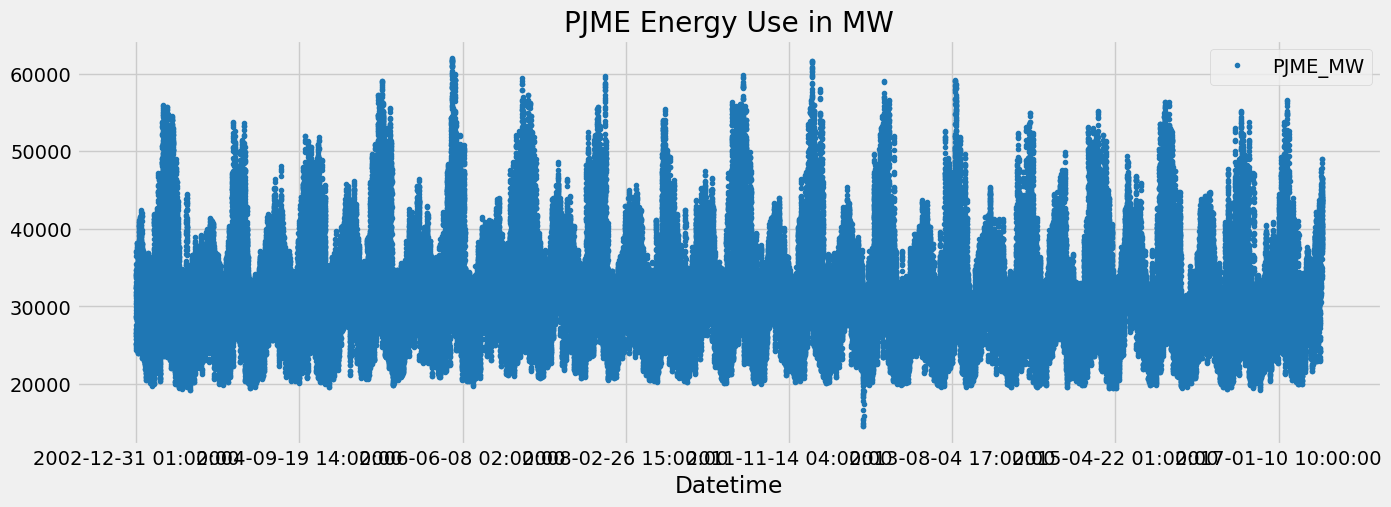

In [7]:
df.plot(style='.', figsize=(15, 5), color=color_pal[0], title='PJME Energy Use in MW')
plt.show()

In [8]:
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [9]:
# As we can see that the index (Datetime) is an object, we can cast this to a Datetime data for better viewing

df.index = pd.to_datetime(df.index)

In [10]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

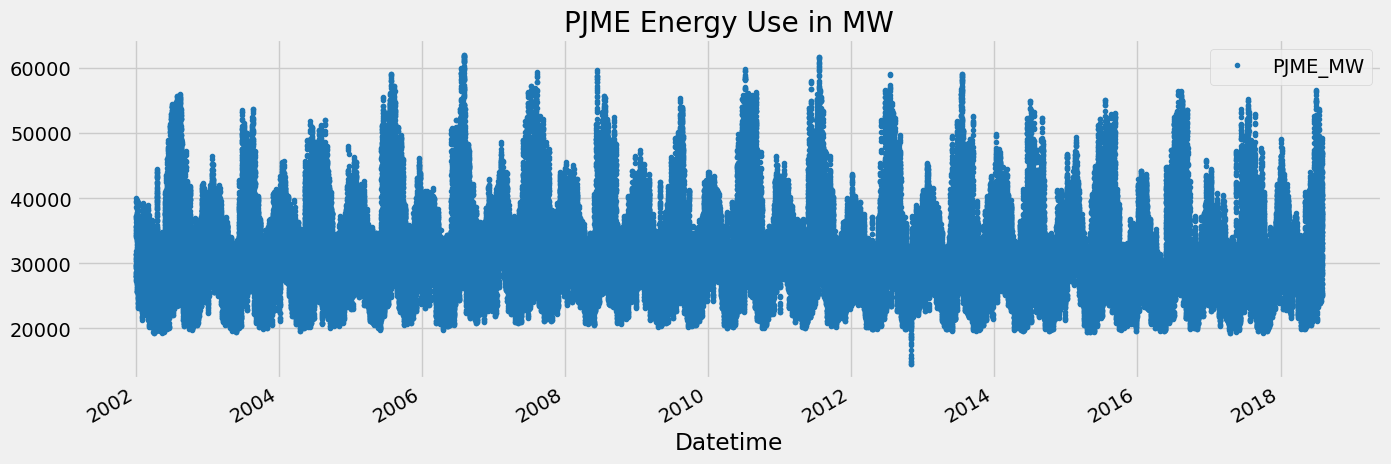

In [11]:
# Lets visualize the plot again

df.plot(style='.', 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='PJME Energy Use in MW')
plt.show()

## Train/Test Split

Lets split our data up to 2015 as Train set
Everything from 2015 as Test set

In [12]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

Lets plot the Train and Test using Subplot to visualize this

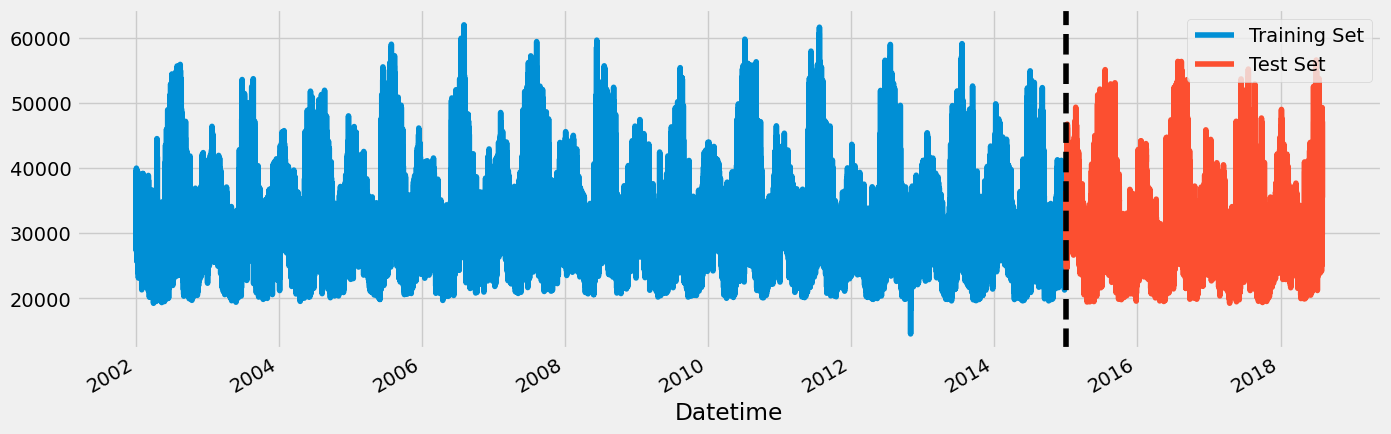

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')        #This includes a line to demacate the Train and Test
ax.legend(['Training Set', 'Test Set'])
plt.show()

#### Lets view the distribution for a week, e.g from '01-01-2013' to '01-08-2013'

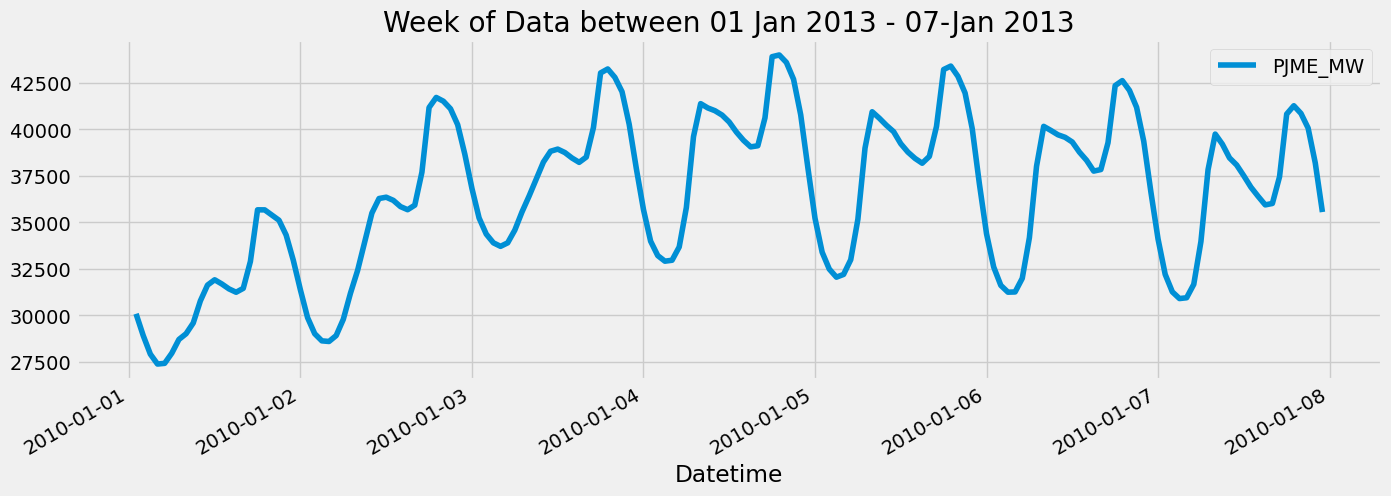

In [14]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].
plot(figsize=(15, 5), title='Week of Data between 01 Jan 2013 - 07-Jan 2013')
plt.show()

### Feature Creation 

In [36]:
def create_features (df):
    """
    Create time series features based on time series index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

## Visualize our Feature/Target relationship

One of the best visuals for visualizing Features/target relationship is by using:

Boxplot: Nice because they show you the distribution of the dataset

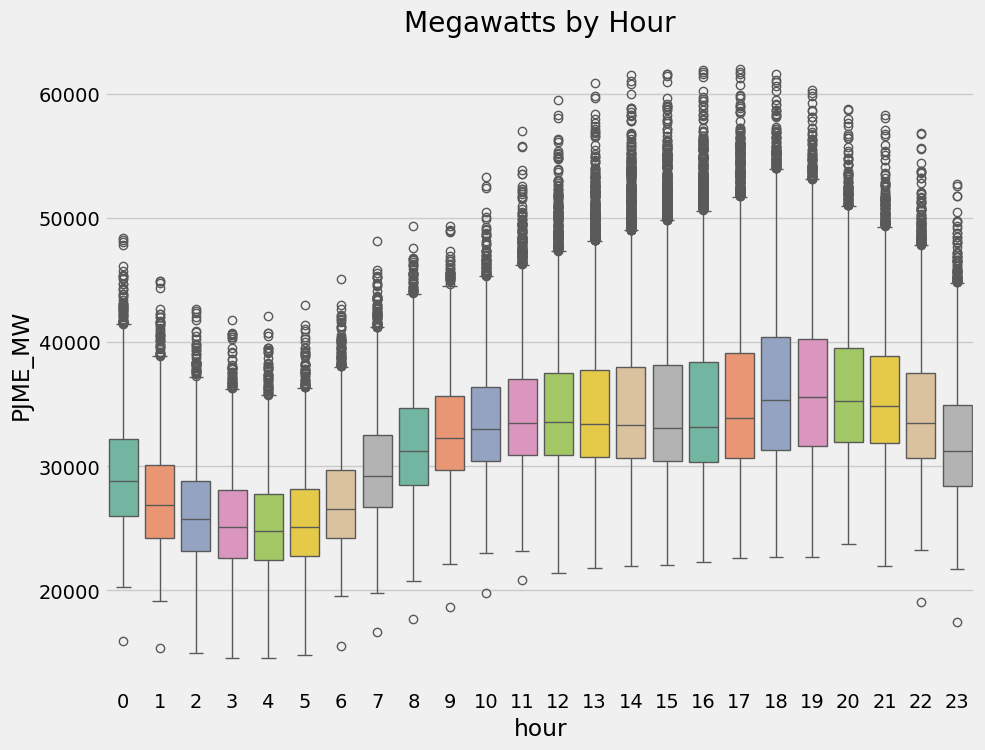

In [29]:
# Colorful palette
palette = sns.color_palette("Set2", n_colors=df['hour'].nunique())

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', palette=palette, ax=ax)
ax.set_title("Megawatts by Hour")
plt.show()

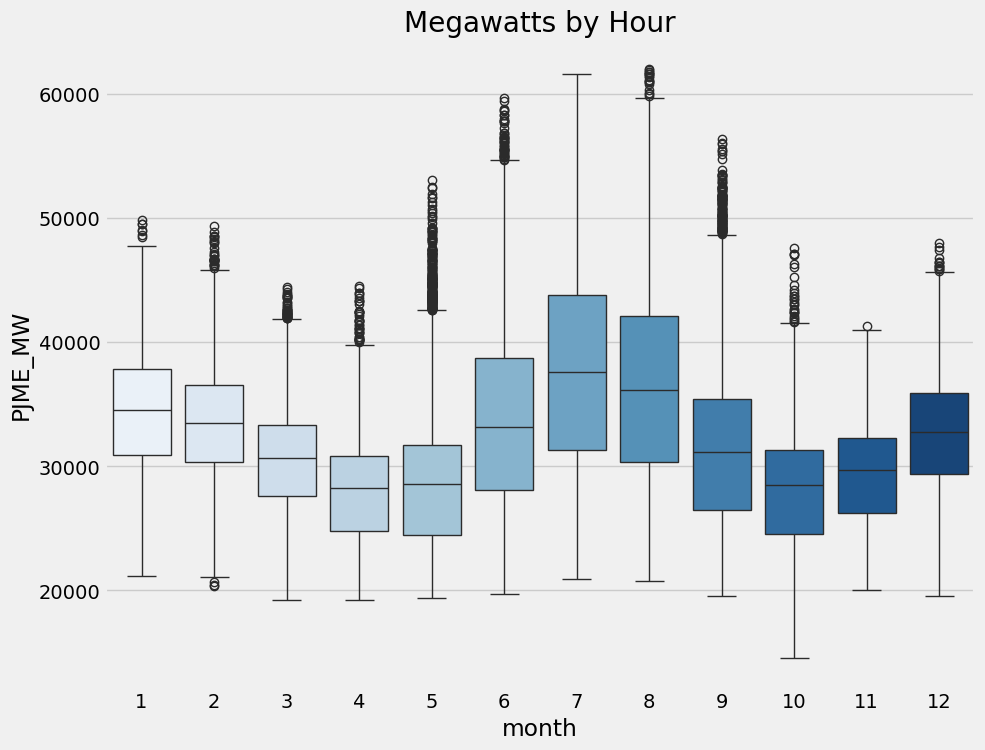

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title("Megawatts by Hour")
plt.show()

## Create our model

In [ ]:
## 

In [38]:
train = create_features(train)
test = create_features(test)

In [39]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [40]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = ['PJME_MW']

In [41]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [46]:
reg = xgb.XGBRegressor(n_estimators = 1000,
                      early_stopping_rounds=50,
                      learning_rate=0.01) 
reg.fit(X_train, 
        y_train, 
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100)  #Tells it to print the training and validation score after every 100 trees

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.26089


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Feature Importance

This tells us what features are the most important to our model

In [47]:
reg.feature_importances_

array([0.46387812, 0.1620048 , 0.02888114, 0.20316096, 0.02382433,
       0.11825063], dtype=float32)

In [54]:
fi= pd.DataFrame(data=reg.feature_importances_, 
                 index=reg.feature_names_in_,
                 columns=['importance'])
fi

,importance
hour,0.463878
dayofweek,0.162005
quarter,0.028881
month,0.203161
year,0.023824
dayofyear,0.118251


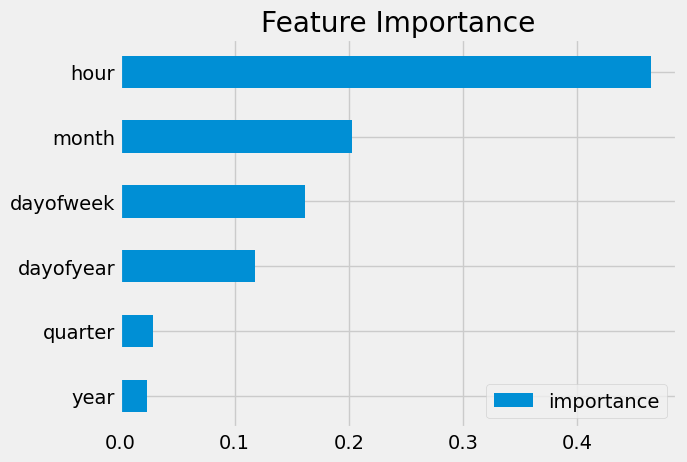

In [55]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Here we see that the model has been using the 'hour', 'month', 'dayofweek', and 'dayofyear' features alot

## Forecast on Test

In [57]:
reg.predict(X_test)

array([32393.352, 29040.168, 27877.018, ..., 36229.527, 35141.754,
       32339.713], dtype=float32)

In [58]:
test['Prediction'] = reg.predict(X_test)

In [60]:
df.merge(test[['Prediction']], how='left', left_index=True, right_index=True)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,Prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,41545.953125
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,41135.625000
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39968.492188


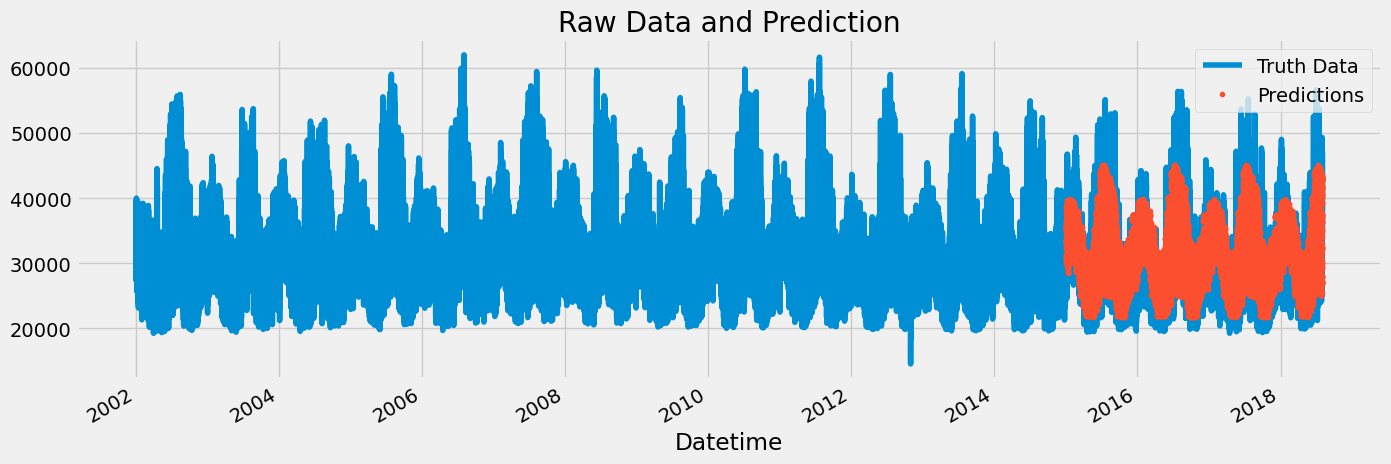

In [61]:
test['Prediction'] = reg.predict(X_test)
df = df.merge(test[['Prediction']], how='left', left_index=True, right_index=True)

ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['Prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

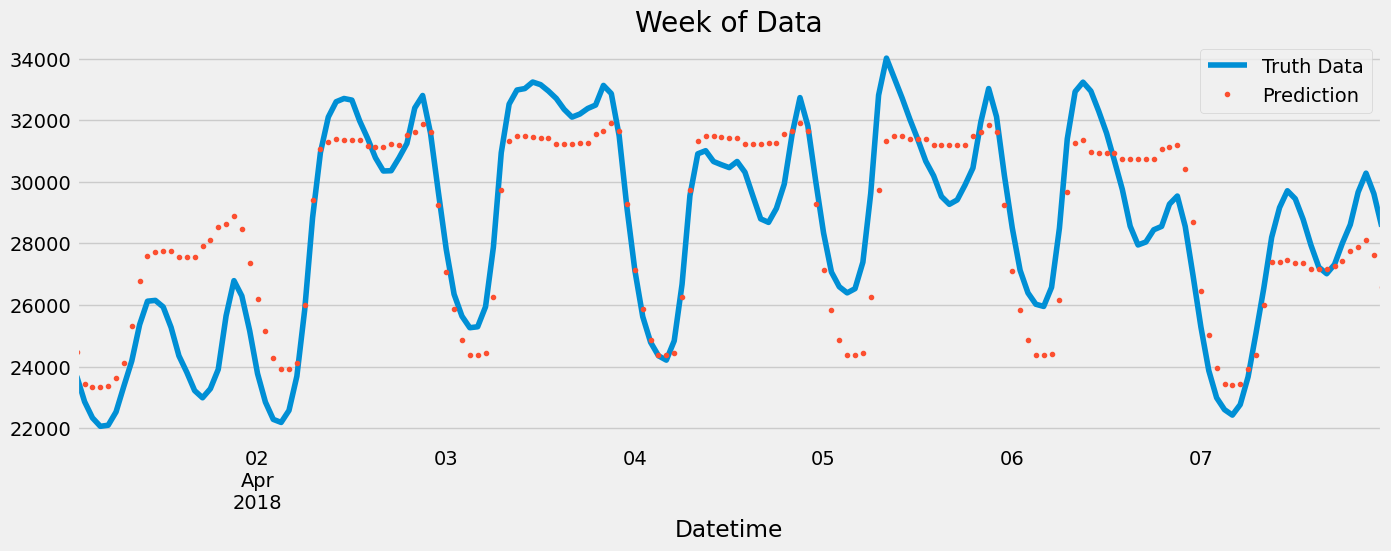

In [63]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week of Data')

df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['Prediction'].plot(style='.')

plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [64]:
mean_squared_error(test['PJME_MW'], test['Prediction'])

13995306.798972495

In [66]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['Prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3741.03
